# EE 399
### Ting Jones
### 4/17/23
### HW 2



In [1]:
# github page: https://github.com/tingjones
# HW 2 repo: https://github.com/tingjones/ee399_hw2

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

## Problem A

In [3]:
# load data, and save images into X
results=loadmat('yalefaces.mat')
X=results['X']

#  get first 100 images
hundr = X[:, :100]
C = np.ndarray((100, 100))

# correlation matrix C, dot product between first 100 images
C = np.matmul(hundr.T, hundr)

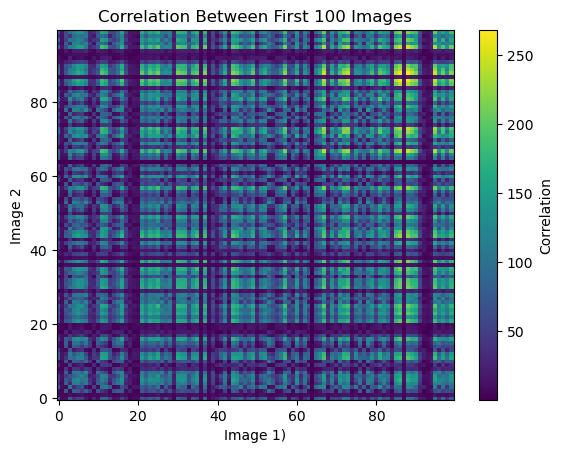

In [4]:
fig, ax = plt.subplots()

ab = ax.pcolor(range(0, 100), range(0, 100), C, vmin = np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between First 100 Images")
ax.set_xlabel("Image 1)")
ax.set_ylabel("Image 2")
fig.colorbar(ab, ax=ax, label="Correlation")

## Problem B

In [5]:
# get the most correlated images
most = np.argwhere(C == np.max(C))

# get the least correlated images
least = np.argwhere(C == np.min(C))

print(most, least) # first image and second image

# notice that images are the same, repeat process
# but with the next greatest/least correlation when indices are different
most = np.argwhere(C == np.sort(C.flatten())[-3])[0]
least = np.argwhere(C == np.sort(C.flatten())[1])[0]
print(most, least)

[[88 88]] [[64 64]]
[86 88] [54 64]


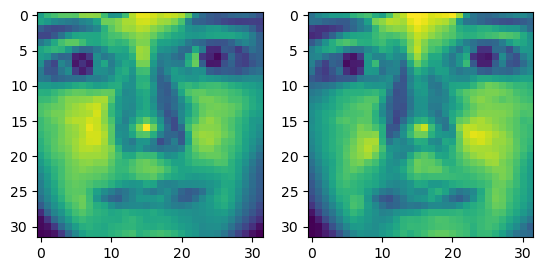

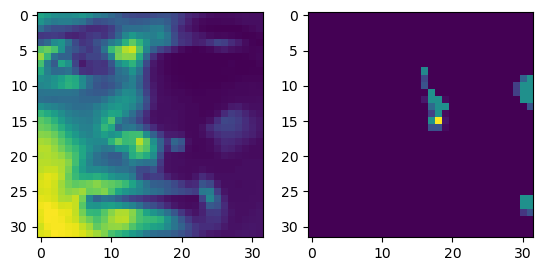

In [6]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,86].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,88].reshape((32, 32), order='F').T)


fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,54].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,64].reshape((32, 32), order='F').T)

## Problem C

In [7]:
img_list = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
get_img = X[:, np.subtract(img_list, 1)]

In [8]:
C = np.ndarray((10, 10))
C = np.matmul(get_img.T, get_img)

# get the most correlated images
most2 = np.argwhere(C == np.max(C))[0]

# get the least correlated images
least = np.argwhere(C == np.min(C))[0]

print(most, least) # first image and second image

[86 88] [1 2]


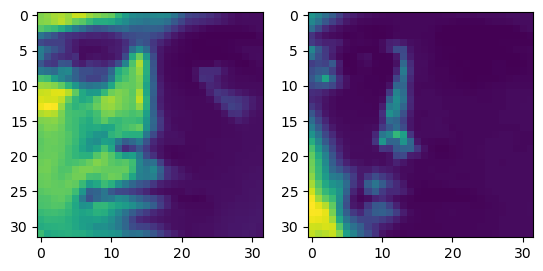

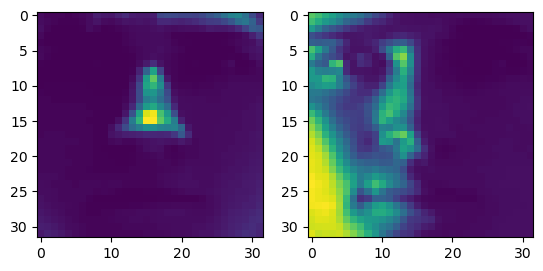

In [10]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,7].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,8].reshape((32, 32), order='F').T)


fig = plt.figure()
ax1 = plt.subplot(121)
ax1.imshow(X[:,1].reshape((32, 32), order='F').T)
ax2 = plt.subplot(122)
ax2.imshow(X[:,2].reshape((32, 32), order='F').T)

In [18]:
Y = np.matmul(X, X.T)


[0.99607843 0.99607843 0.99607843 0.99607843 0.99607843 0.99607843]


In [16]:
u,s,v= np.linalg.svd(X)

print(u)

[[-0.02384327  0.04535378  0.05653196 ... -0.00238077 -0.0015886
   0.00041024]
 [-0.02576146  0.04567536  0.04709124 ...  0.00265168  0.00886966
  -0.0047811 ]
 [-0.02728448  0.04474528  0.0362807  ... -0.00073077 -0.00706009
   0.00678472]
 ...
 [-0.02082937 -0.03737158  0.06455006 ... -0.0047683   0.00596037
   0.0032901 ]
 [-0.0193902  -0.03557383  0.06196898 ... -0.00173228  0.00175508
   0.00131795]
 [-0.0166019  -0.02965746  0.05241684 ...  0.00458062 -0.00266653
  -0.00168849]]


In [ ]:
u,s,v=np.linalg.svd(X)
fig = plt.figure(figsize=(15, 10))
for k in range(9):
    Up = u[:, k].reshape((32, 32), order='F')
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot)

print(s.shape)
print(s[0:5])
print(v.shape)
print(np.sum(s))